<a href="https://colab.research.google.com/github/Aurelio-Naufal/Case-Study-Data-Mining-Aplikasi-Model-Klasifikasi-Kelompok-8/blob/main/CaseStudy02_DataMining_Kelompok8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h2><strong><font color="blue">Kelompok 8</font></strong></h2></center>

Anggota Kelompok:
1. Aurelio Naufal Effendy (2106638526)
2. Esly Vani Frasanti Saragih (2106700782)
3. Jihan Sandrina Halim (2106708160)
4. Zahrah Mahfuzah (2106704004)
5. Daffa Abrar Makarim (2106653685)

Link github tugas : https://github.com/Aurelio-Naufal/Case-Study-Data-Mining-Aplikasi-Model-Klasifikasi-Kelompok-8

Link GoogleColab : https://colab.research.google.com/drive/1jU7DP_TLFnmJQmvYHAqxfnFSlcGviuxl?usp=sharing

<center><h2><strong><font color="blue">Studi Kasus Data Mining: Aplikasi Model klasifikasi</font></strong></h2></center>

**Domain Knowledge & Data Understanding**:


*   Data dibawah ini adalah data Hoax dari https://www.mafindo.or.id/ yang didapatkan secara legal dengan meminta izin kepada pimpinan perusahaan Mafindo.
*   Label "0" menyatakan bukan Hoax dan "1" menyatakan post Hoax

# **Pre-Processing**
Dalam tahap preprocessing, akan dilakukan langkah-langkah berikut untuk mendapatkan dataset yang bersih dan siap untuk dilakukan Exploratory data analysis (EDA).
1. **Import library**
2. **Data Acquisition**
3. **Data Preprocessing**
  - **Check Missing Value**
  - **Check Duplicate Value**
  - **Handling slang & abbreviation**
  - **Remove Stopword**
  - **Tokenization**

  



In [ ]:
!pip install sastrawi unidecode textblob

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 6.2 MB/s eta 0:00:00


 `!pip install sastrawi unidecode textblob` digunakan untuk menginstal library Python "Sastrawi," "Unidecode," dan "TextBlob" menggunakan pip package manager.
  
  `sastrawi` merupakan library untuk melakukan preprocessing dengan bahasa Indonesia seperti stemming, removing stop words, dll.
  
  Fungsi library `unidecode` adalah untuk mengonversi teks Unicode ke karakter ASCII. Unidecode adalah library Python yang memungkinkan konversi teks Unicode ke karakter ASCII.
  
  `textblob` adalah sebuah perpustakaan Python yang digunakan untuk memproses data teks dan tugas-tugas pemrosesan bahasa alami (NLP) dengan API yang digunakan untuk ekstraksi phrase benda, analisis sentimen, klasifikasi, terjemahan, dll. TextBlob dibangun dari library NTLK.

In [ ]:
import warnings; warnings.simplefilter('ignore')
import nltk

try:
    import google.colab; IN_COLAB = True
    !wget https://raw.githubusercontent.com/taudataanalytics/taudata-Academy/master/taudataNlpTm.py
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/taudata-Academy/master/data/slang.txt
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/taudata-Academy/master/data/stopwords_id.txt
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/taudata-Academy/master/data/stopwords_en.txt
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/taudata-Academy/master/data/kata_dasar.txt
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/taudata-Academy/master/data/wn-ind-def.tab
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/taudata-Academy/master/data/wn-msa-all.tab
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/taudata-Academy/master/data/ind_SA.csv
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/taudata-Academy/master/data/all_indo_man_tag_corpus_model.crf.tagger

    !pip install spacy python-crfsuite unidecode textblob sastrawi
    !python -m spacy download xx
    !python -m spacy download en_core_web_sm

    nltk.download('popular')
except:
    IN_COLAB = False
    print("Running the code locally, please make sure all Python module versions agree with Colab environment and all data/datasets downloaded")

--2023-11-24 17:06:57--  https://raw.githubusercontent.com/taudataanalytics/taudata-Academy/master/taudataNlpTm.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14001 (14K) [text/plain]
Saving to: ‘taudataNlpTm.py’

taudataNlpTm.py     100%[===================>]  13.67K  --.-KB/s    in 0s      

2023-11-24 17:06:57 (87.0 MB/s) - ‘taudataNlpTm.py’ saved [14001/14001]

--2023-11-24 17:06:57--  https://raw.githubusercontent.com/taudataanalytics/taudata-Academy/master/data/slang.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

NLTK (Natural Language Toolkit) adalah sebuah library yang digunakan untuk pemrosesan bahasa alami (NLP) dalam bahasa  Python. Library ini menyediakan berbagai alat dan sumber daya untuk memproses teks, seperti tokenisasi, stemming, lemmatization, analisis sentimen, klasifikasi teks, dll.

In [ ]:

import tweepy
import time
import numpy as np, matplotlib.pyplot as plt, pandas as pd, seaborn as sns
import re
from tweepy import OAuthHandler
from textblob import TextBlob
from wordcloud import WordCloud
import warnings; warnings.simplefilter('ignore')
import itertools, re, nltk
import time
from matplotlib.colors import ListedColormap
from textblob import TextBlob
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from unidecode import unidecode
from nltk.tag import CRFTagger
from html import unescape
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from tqdm import tqdm
import nest_asyncio
import pandas as pd
from sklearn.model_selection import train_test_split

nltk.download('punkt')

factory = StopWordRemoverFactory()
stemmer = StemmerFactory().create_stemmer()
sns.set(style="ticks", color_codes=True)
random_state = 170
'Done'

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


'Done'


1. `import tweepy`: Mengimpor library Tweepy, yang merupakan library Python untuk berinteraksi dengan Twitter API. Tweepy memungkinkan pengguna untuk mengakses berbagai fitur Twitter seperti streaming, pencarian, dan lainnya

2. `import time`: Mengimpor library time, yang menyediakan fungsi-fungsi terkait waktu, seperti pengukuran waktu, penundaan, dan lainnya.

3. `import numpy as np`: untuk komputasi numerik

4. `matplotlib.pyplot as plt`: untuk visualisasi data

5. `pandas as pd`: untuk analisis data

6. `seaborn as sns`: untuk visualisasi data statistik.

7. `from tweepy import OAuthHandler`: Mengimpor class OAuthHandler dari library Tweepy untuk melakukan otentikasi dengan Twitter API.

8. `from textblob import TextBlob`: Mengimpor class TextBlob dari library TextBlob, yang digunakan untuk pemrosesan teks dan analisis bahasa alami.

9. `from wordcloud import WordCloud`: Mengimpor class WordCloud dari library WordCloud, yang digunakan untuk membuat visualisasi word cloud dari teks.

10. `import warnings; warnings.simplefilter('ignore')`: Mengimpor library warnings dan menetapkan filter untuk mengabaikan peringatan.

11. `import itertools, re, nltk`: Mengimpor library itertools, re (regular expression), dan nltk (Natural Language Toolkit) untuk Natural Language Processing.

12. `import time` : Mengimpor library time, numpy, matplotlib.pyplot, pandas, dan seaborn.

13. `from matplotlib.colors import ListedColormap`: Mengimpor class ListedColormap dari library matplotlib.colors untuk pemetaan warna.

14. `from Sastrawi.Stemmer.StemmerFactory import StemmerFactory`: Mengimpor class StemmerFactory dari library Sastrawi untuk stemming teks dalam bahasa Indonesia.

15. `from unidecode import unidecode`: Mengimpor function unidecode dari library unidecode untuk mentransliterasi teks Unicode ke ASCII.

16. `from nltk.tag import CRFTagger`: Mengimpor class CRFTagger dari library nltk untuk penandaan teks menggunakan Conditional Random Fields.

17. `from html import unescape`: Mengimpor function unescape dari library html untuk mendekode entitas HTML dalam teks.

18. `from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory`: Mengimpor class StopWordRemoverFactory dari library Sastrawi untuk menghapus kata-kata penghubung dalam teks bahasa Indonesia.

19. `from tqdm import tqdm`: Mengimpor class tqdm dari library tqdm untuk menampilkan bar progress saat execution.

20. `import nest_asyncio`: Mengimpor library nest_asyncio untuk mengatasi konflik antara asyncio dan library Tweepy.

21. `from sklearn.model_selection import train_test_split`: Mengimpor function train_test_split dari library scikit-learn untuk membagi dataset menjadi data latih dan data uji.


In [ ]:
# Loading Data
import warnings; warnings.simplefilter('ignore')
import pandas as pd

fData = 'data/Data-Hoax-Mafindo.csv'
try:
    data = pd.read_csv(fData) # read data local storage
except:
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/taudata-Academy/master/data/Data-Hoax-Mafindo.csv # read data dari url
    data = pd.read_csv(fData)

data.head(20) # menampilkan 20 data pertama

mkdir: cannot create directory ‘data’: File exists
--2023-11-24 17:08:37--  https://raw.githubusercontent.com/taudataanalytics/taudata-Academy/master/data/Data-Hoax-Mafindo.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1279335 (1.2M) [text/plain]
Saving to: ‘data/Data-Hoax-Mafindo.csv’

Data-Hoax-Mafindo.c 100%[===================>]   1.22M  --.-KB/s    in 0.03s   

2023-11-24 17:08:37 (47.0 MB/s) - ‘data/Data-Hoax-Mafindo.csv’ saved [1279335/1279335]



,ID,label,tanggal,judul,narasi,nama file gambar
0,71,1,17-Aug-20,Pemakaian Masker Menyebabkan Penyakit Legionna...,A caller to a radio talk show recently shared ...,71.jpg
1,461,1,17-Jul-20,Instruksi Gubernur Jateng tentang penilangan ...,Yth.Seluruh Anggota Grup Sesuai Instruksi Gube...,461.png
2,495,1,13-Jul-20,Foto Jim Rohn: Jokowi adalah presiden terbaik ...,Jokowi adalah presiden terbaik dlm sejarah ban...,495.png
3,550,1,8-Jul-20,"ini bukan politik, tapi kenyataan Pak Jokowi b...","Maaf Mas2 dan Mbak2, ini bukan politik, tapi k...",550.png
4,681,1,24-Jun-20,Foto Kadrun kalo lihat foto ini panas dingin,Kadrun kalo lihat foto ini panas dingin . .,681.jpg
5,736,1,17-Jun-20,event promo smartphone JNE 2020 spesial di bul...,"selamat siang teman teman fb ku semuanya🤩,cuma...",736.png
6,1161,1,5-May-20,MEREKA SUDAH MEMPERSIAPKAN DIRI DENGAN BAIK UN...,LIHATLAH MEREKA SUDAH MEMPERSIAPKAN DIRI DENGA...,1161.png
7,1597,1,24-Mar-20,Foto Presiden Italia menangis karena tak cukup...,Italia punya fasilitas perawatan kesehatan ter...,1597.png
8,2098,1,9-Jan-20,"Kapolres Timor Tengah Utara , Nusa Tenggara Ti...",Polisi goblok. Bukanya cpet” d tolongin malah ...,2098.jpg
9,2226,1,24-Dec-19,Video Polisi china telah menganiaya wanita uig...,Polisi china telah menganiaya wanita uighur le...,2226.png


Menampilkan 20 data pertama dari dataframe `data`

## Missing Value

In [ ]:
# Cek missing value
data.isna().sum()

ID                  0
label               0
tanggal             0
judul               0
narasi              0
nama file gambar    0
dtype: int64

Tidak ada missing value dari semua kolom pada data.

## Duplikasi Data
Akan dilakukan pengecekan data duplikat dalam kolom narasi dan judul untuk mencegah adanya nilai yang berulang.

In [ ]:
data.duplicated(subset = 'narasi').sum() #cek data yang terduplikat dari kolom narasi

26

Terdapat 26 data terduplikat dari kolom narasi.

In [ ]:
data[data.duplicated(subset = 'narasi')] #menampilkan data duplikat untuk kolom 'narasi'

,ID,label,tanggal,judul,narasi,nama file gambar
427,98616,1,29-Jul-20,Antena 5G di dalam masker Anda,5G antenna inside of your masks,98616.png
497,115208,1,11-Jul-20,Foto All Jakarta Water Park,PERKENALKAN: ALL JAKARTA WATER PARK,115208.png
812,188319,0,28-Nov-15,Jokowi Lebih Memilih Helikopter Buatan Luar Ne...,"INSTING MAKELAR\n \n AKU Awalnya kaget, membac...",188319.png
892,204936,1,11-Aug-20,Corona is a hoax,CORONA IS A HOAX,204936.jpg
1344,312152,1,2-Jun-20,Foto Sekarang malesiya sapu habis penduduk asi...,Perhatian perhatian Sekarang malesiya makin da...,312152.jpg
1632,372224,1,18-Apr-19,Data di Mabes TNI berdasarkan Formulir C1,Cek tangkapan layar.,372224.png
1776,405308,1,23-Feb-19,Foto Suntingan Jokowi,Cek tangkapan layar.,405308.png
1777,405325,1,19-Feb-19,Terdapat obat bius di daun teh Tiek Kwan Im,Cek tangkapan layar,405325.png
2103,492286,1,14-Jun-20,"Hantu Nge-GYM di Taman Jhansi, India Karena T...",Weird things happening at deserted Japani park...,492286.jpg
2501,583363,1,14-Mar-20,"Queensland, Australia: Actor Tom Hanks has die...",A Queensland Health spokeswoman said the actor...,583363.png


In [ ]:
data.shape # mengecek dimensi data (baris, kolom)

(4701, 6)

Dataframe `data` memiliki **4701** baris dan **6** kolom

In [ ]:
data.duplicated().sum()

0

Data duplikat berjumlah 0

In [ ]:
# Drop data duplikat berdasarkan judul
data.drop_duplicates(subset='judul', keep='first', inplace=True, ignore_index=False)
data.shape

(4687, 6)

Setelah data duplikat berdasarkan kolom `judul` dihapus, dataframe data bersisa **4687** baris dan *6 kolom*. Ini berarti terdapat **20** data dengan kolom `judul` yang terduplikat telah dihapus.

## **Kolom Narasi**

Karena kita hanya akan mengolah data teks, maka akan diambil kolom narasi saja dari data. Variabel teks yang dilakukan proses data cleaning hanya "narasi" karena tujuan dari pemodelan pengklasifikasian adalah data hoax atau tidak, maka haox atau tidaknya sebuah berita ditinjau dari narasinya bukan dari judulnya. Judul dari sebuah berita atau kabar hanya berfungsi untuk gambaran narasi secara umum atau untuk menarik perhatian pembaca dan kurang dapat membuktikan kebenaran suatu pernyataan atau berita.

In [ ]:
# Ambil kolom narasi untuk dipisahkan
data_narasi = data[['narasi']]
data_narasi.at[0,'narasi']

'A caller to a radio talk show recently shared that his wife was hospitalized n told she had COVID n only a couple of days left to live . A doctor friend suggested she be tested for legionnaires disease because she wore the same mask every day all day long . Turns out it WAS legionnaires disease from the moisture n bacteria in her mask . She was given antibiotics n within two days was better . WHAT IF these ‘spikes’ in COVID are really something else due to ‘mask induced infections’ .??🤔🤔🤔'

## Data Cleaning
Untuk data cleaning, akan dibuat fungsi agar bisa digunakan kembali untuk dataframe lain. Fungsi ini akan menghilangkan link, URL, symbol selain "_", dan melakukan stemming.

In [ ]:
def clean_text(txt): #fungsi untuk membersihkan data
    text = unidecode(unescape(txt.lower().strip())) #Remove URL
    urlPattern = re.compile(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    text = re.sub(urlPattern,' ', text) # Remove links
    text = re.sub(r'[^\w]', ' ', text) # Remove Symbol, keep "_"
    text = stemmer.stem(text) #stemming
    return text

Setelah fungsi dideklarasi, hasil cleaning akan disimpan dalam kolom `clean narasi`.

In [ ]:
data_narasi['clean_narasi'] = '' # initiate kolom kosong untuk diisi kolom narasi yang sudah dibersihkan
data_narasi['clean_narasi'] = data_narasi['narasi'].apply(clean_text) #jalankan fungsi pada data
data_narasi.head()

## Penanganan Slang dan Singkatan
Slang akan diambil dari corpus `slang.txt`. Slang corpus ini akan digunakan untuk menggantikan token kata-kata yang dianggap slang dengan value yang menjadi arti dari slang.

In [ ]:
# Keluarkan dictionary kata-kata slang dari modul taudata
df=open('data/slang.txt',"r",encoding="utf-8", errors='replace')
slangS = df.readlines(); df.close()
slangS = [t.strip('\n').strip() for t in slangS] # hapus enter dari setiap elemen dalam list slangS

print(slangS[:5]) # print 5 elemen pertama dari list slangS

# pisahkan berdasarkan ':'
slangS = [t.split(":") for t in slangS]
slangS = [[k.strip(), v.strip()] for k,v in slangS] # hapus spasi dari key dan value dalam setiap pasangan kata-kata
print(slangS[:5])
slangS = {k:v for k,v in slangS} # buat dictionary dari pasangan kata dengan key dan value

['& : dan', '1pun : satupun', '7an : tujuan', '@ : di', 'Dr : dokter']
[['&', 'dan'], ['1pun', 'satupun'], ['7an', 'tujuan'], ['@', 'di'], ['Dr', 'dokter']]


In [ ]:
def slangfreetext(text): #fungsi untuk mengubah singkatan / slank words menjadi kata yang dimaksud
  Tokens = TextBlob(text).words # Tokenisasi
  for i,t in enumerate(Tokens):
      if t in slangS.keys():
          Tokens[i] = slangS[t]    # ganti kata dalam token dengan kata dictionary slangS
  docx = ' '.join([t for t in Tokens]) # gabung kembali token menjadi teks
  return docx

In [ ]:
data_narasi['clean_narasi'] = data_narasi['clean_narasi'].apply(slangfreetext) #jalankan fungsi pada data
data_narasi.head()

## Stopwords
Stopwords adalah kata-kata yang dianggap redundan dan tidak memiliki makna ketika berdiri sendiri. Adapun untuk stopwords bahasa Indonesia dapat dimuat dalam library `Sastrawi` dan untuk bahasa Inggris dalam library `ntlk`.

In [ ]:
# Loading Stopwords
# Stopwords bahasa Indonesia
Sastrawi_StopWords_id = factory.get_stop_words()

print(Sastrawi_StopWords_id)
print(len(Sastrawi_StopWords_id))

Sastrawi_StopWords_id = set(Sastrawi_StopWords_id)

['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', '

Terdapat **126** stopwords bahasa Indonesia dalam library `Sastrawi`. Diantaranya ada 'yang', 'untuk', dan 'pada'.

In [ ]:
# Stopwords Bahasa Inggris
import nltk
nltk.download('stopwords') # mendownload class stopwords
from nltk.corpus import stopwords

print(stopwords.words('english'))
StopWords_en = set(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Terdapat 'i', 'me', 'my', dan banyak stopwords lainnya dalam library `ntlk`.

In [ ]:
# Stopwords tambahan berdasarkan pengamatan pada data
MoreStopWord = ["tidak", "jadi", "kamu", "sudah", "banget", "lihat", "sama", "berapa","buat","jadi","kalau","kali","habis","saja","apa","ini","akhir","sama","baik","banyak","juga","lagi",'yang',
                    'yg', 'gue', 'gw', 'gua', 'aku', 'untuk', 'utk', 'pada', 'sedang', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika','sehingga', 'kembali',
                    'dan', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal',
                    'ketika', 'adalah', 'itu', 'dalam', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda',
                    'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya',
                    'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'boleh', 'dapat',
                    'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', 'oh', 'seharusnya', 'sebetulnya', 'setiap', 'setidaknya',
                    'sesuatu', 'pasti', 'saja', 'toh', 'ya', 'walau', 'tolong', 'tentu', 'apalagi', 'bagaimanapun', 'oalah', 'hoalah', 'pildun', 'di', 'ini', 'saya', 'kamu', 'dan', 'karena',
                    'saja', 'siapa', 'juga', 'kalau', 'dengan', 'dia', 'dari', 'sudah', 'masih', 'sampai', 'nya', 'akan', 'sih', 'pa', 'https', 'dan', 'ini', 'yang', 'banget', 't', 'banget',
                    'sudah', 'sama', 'nah', 'lah', 'itu', 'yang', 'pas','yah', 'ngga', 'nggak',"main","mau","lebih","kemarin","cuma","sekarang","dulu", 'bukan','dunia',
                    "tahu",'bakal','baru','orang','kayak','deh','mah','bang','jangan','sayang','bisa','doang','semua','jam','hari','memang','tadi','bahkan','tiap','lalu','terus','bagaimana',
                    'hari','biar','kok','wkwkwk','gitu','gara','emang','gara2','bikin','padahal','benar','orang','hari','sebut','the','iya']
Sastrawi_StopWords_id.update(MoreStopWord) # menambahkan list stopwords dengan list custom tambahan yang ada dalam list MoreStopWord
print(Sastrawi_StopWords_id)
print(len(Sastrawi_StopWords_id))

In [ ]:
def stopwords(text): #fungsi untuk merove stopwords dari data
  Tokens = TextBlob(text).words # tokenisasi
  docx = ' '.join([t for t in Tokens if str(t) not in Sastrawi_StopWords_id and StopWords_en and len(t)>2]) # Stopwords filtering untuk Stopword bahasa Indonesia dan Inggris serta kata-kata yang panjangnya kurang sama dengan 2
  return docx

In [ ]:
data_narasi['clean_narasi'] = data_narasi['clean_narasi'].apply(stopwords) #jalankan fungsi pada data
data_narasi.head() #diperoleh data yang sudah rapih setelah dilakukan preprocessing

Narasi akan dihilangkan stopword bahasa inggris, bahasa indonesia, dan kata yang panjangnya kurang dari 2 huruf. Langkah menghilangkannya adalah dengan mentokenisasi kata-kata serta menambahkan stopword sesuai keinginan, dengan mencocokkan tiap kata yang sudah ditokenisasi dengan list stopword. Jika ada yang persis sama, akan dihilangkan dan jika tidak akan dibiarkan menjadi output.

## Save Data Untuk Memudahkan Proses Selanjutnya
Hasil preprocessing yang dilakukan akan disave dalam github agar bisa menghemat waktu komputasi untuk explorasi data.

In [ ]:
# from google.colab import files

#untuk narasi yang sudah dibersihkan saja, data sudah disimpan di github
# data_narasi['clean_narasi'].to_csv('cleaned_narasi.txt', encoding = 'utf-8', index=False, header=False)
# files.download('cleaned_narasi.txt')

In [ ]:
# Ambil data dari kolom narasi yang telah dibersihkan yang sudah tersedia di github
data_narasi = pd.read_csv("https://raw.githubusercontent.com/Aurelio-Naufal/Case-Study-Data-Mining-Aplikasi-Model-Klasifikasi-Kelompok-8/main/cleaned_narasi.txt", header=None, encoding='utf8')
data_narasi.head()

,0
0,caller radio talk show recently shared that hi...
1,yth seluruh anggota grup sesuai instruksi gube...
2,jokowi presiden sejarah bangsa indonesia jim r...
3,maaf mas2 mbak2 politik nyata pak jokowi hasil...
4,kadrun foto panas dingin


In [ ]:
data_narasi.shape #mengecek dimensi data narasi (baris, kolom)

(4687, 1)

# **EDA**

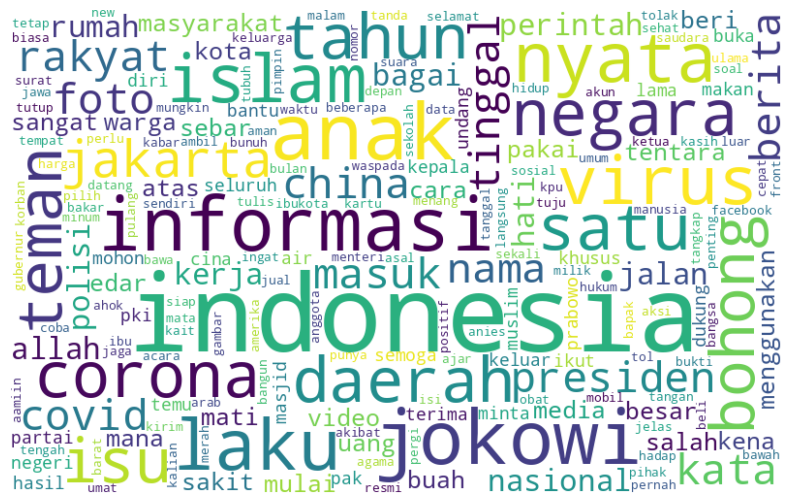

In [ ]:
# membuat wordcloud dari tweet
all_words = ' '.join(map(str,[text for text in data_narasi[0]]))
wordcloud = WordCloud(collocations = False, background_color='white', width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Berdasarkan word cloud dari seluruh data berita perusahaan Mafindo, terlihat bahwa **Indonesia, Jokowi, virus, dan anak** menjadi kata yang paling banyak dibicarakan.

In [ ]:
# menggabungkan data untuk visualisasi hasil labeling
df_label = pd.concat([data_narasi, data['label']], axis=1)
df_label

,0,label
0,caller radio talk show recently shared that hi...,1
1,yth seluruh anggota grup sesuai instruksi gube...,1
2,jokowi presiden sejarah bangsa indonesia jim r...,1
3,maaf mas2 mbak2 politik nyata pak jokowi hasil...,1
4,kadrun foto panas dingin,1
...,...,...
4696,NaN,0
4697,NaN,1
4698,NaN,1
4699,NaN,1


In [ ]:
# Dataframe untuk masing-masing data hoax dan bukan hoax
df_label_hoax = df_label[0][df_label['label']==1] # Data hasil labeling dengan data hoax
df_label_nohoax = df_label[0][df_label['label']==0] # Data hasil labeling dengan bukan hoax

### **Hoax Word Cloud**

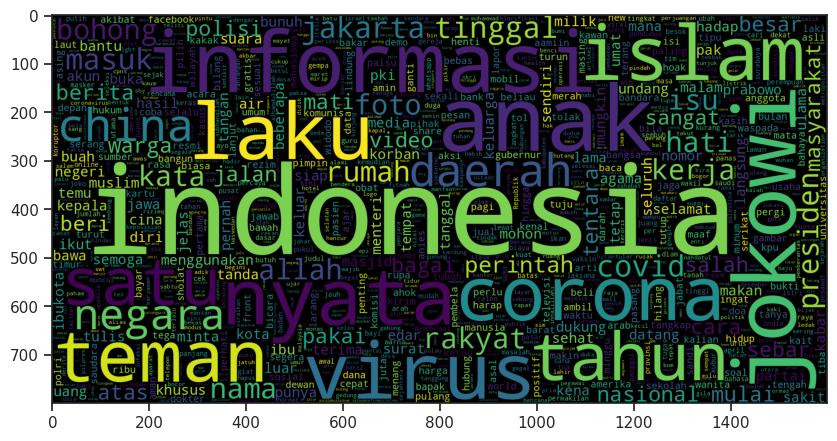

In [ ]:
# word cloud untuk berita yang mengandung hoax
plt.figure(figsize = (10,6))
wc1 = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(",".join([str(i) for i in df_label_hoax]))
plt.imshow(wc1)

Berdasarkan word cloud dari seluruh data berita hoax perusahaan Mafindo, terlihat bahwa **virus, corona, dan China** cenderung menjadi kata atau topik yang paling banyak dibicarakan.

### **Bukan Hoax Word Cloud**

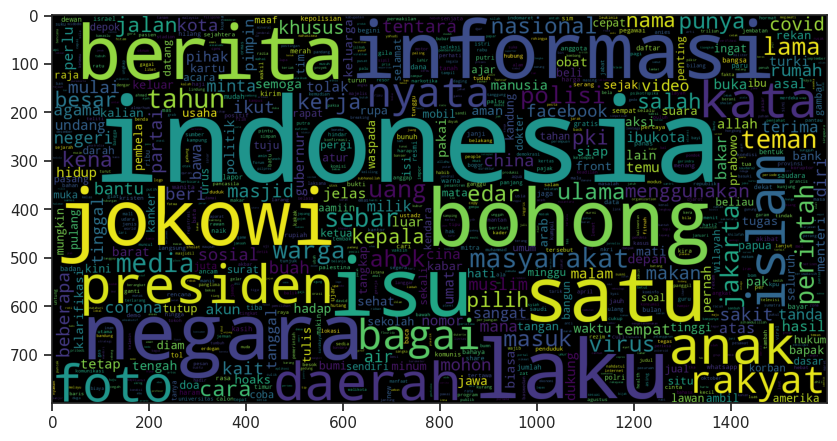

In [ ]:
# word cloud untuk berita yang tidak mengandung hoax
plt.figure(figsize = (10,6))
wc1 = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(",".join([str(i) for i in df_label_nohoax]))
plt.imshow(wc1)

Berdasarkan word cloud dari seluruh data berita bukan hoax perusahaan Mafindo, terlihat bahwa **bohong, isu, dan informasi** cenderung menjadi kata yang paling banyak dibicarakan. Selain itu, dapat disimpulkan juga hal-hal yang menjadi berita hoax dan yang tidak cenderung hampir sama.

### **Voyant**

In [ ]:
# Dengan menggunakan software voyant di internet diperoleh

#### Kata-kata berasosiasi hoax
Kata-kata yang berkaitan dengan hoax (1), berdasarkan gambar tersebut dapat dilihat bahwa berita hoax paling sering berasosiasi dengan kata virus, corona, covid, china, presiden, jokowi, islam, anak, dan informasi

![Kata-Kata yang Berkaitan dengan Hoax](https://raw.githubusercontent.com/Aurelio-Naufal/Case-Study-Data-Mining-Aplikasi-Model-Klasifikasi-Kelompok-8/main/Screenshot%202023-11-24%20171033.png)

#### Kata-kata berasosiasi non-hoax
Kata-kata yang berkaitan dengan non hoax (0), berdasarkan gambar tersebut dapat dilihat bahwa berita non hoax paling berasosiasi dengan kata informasi, bohong, isu, jokowi, indonesia, dan anak

![Kata-Kata yang Berkaitan dengan Bukan Hoax](https://raw.githubusercontent.com/Aurelio-Naufal/Case-Study-Data-Mining-Aplikasi-Model-Klasifikasi-Kelompok-8/main/Screenshot%202023-11-24%20171010.png)

Dapat disimpulkan bahwa **berita hoax** cenderung berasal dari topik covid / virus corona, dan china, sedangkan **berita non hoax** cenderung berkaitan dengan kata-kata : bohong, isu, dan informasi, hal ini masuk akal karena dalam berita non hoax biasanya berita tersebut memberitahukan atau memberikan fakta terhadap berita hoax yang berisi kebohongan dan atau sekedar isu. Sedangkan untuk keyword lainnya seperti jokowi, indonesia, dan lain-lain dapat berupa **berita hoax maupun non hoax**.

# Model Klasifikasi
Untuk mengklasifikasi text yang merupakan hoax dan non hoax, akan digunakan metode:
1. Naive Bayes
2. Decision Tree
3. Random Forest
4. Support Vector Machine (SVM)
5. Neural Network

In [ ]:
# Klasifikasi
import warnings; warnings.simplefilter('ignore')
import pandas as pd, matplotlib.pyplot as plt
import time, numpy as np, seaborn as sns
from sklearn import  tree
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
#from dtreeviz.trees import *
#import graphviz
from sklearn import svm, preprocessing
from sklearn.gaussian_process.kernels import RBF
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
sns.set(style="ticks", color_codes=True)
"Done"

'Done'

In [ ]:
# Mengambil kolom label dari data asli
data_label = data['label']
data_label.values

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
# merubah data ke bentuk yang dapat dimodelkan
x = data_narasi[0].fillna(' ')
y = data_label.values

In [ ]:
# VSM
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(lowercase = True, stop_words = 'english', smooth_idf = True, sublinear_tf = True,
                                   ngram_range = (1,2), max_df = 0.90, min_df = 2)

#### **Slicing Data**

Membagi data menjadi data train dan data test dengan perbandingan 7:3. Pemodelan akan dilakukan terhadap data train dan akan diuji akurasinya terhadap data test melalui cross validation.

In [ ]:
from sklearn.model_selection import train_test_split
seed = 99

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=seed)
x_train = tfidf_vectorizer.fit_transform(x_train)# "Fit_Transform"
x_test = tfidf_vectorizer.transform(x_test) # "Transform"

print(x_train.shape, x_test.shape)

(3280, 8176) (1407, 8176)


In [ ]:
# untuk menghapus data yang kosong akibat dari pembersihan data
def hapusKosong(X,Y):
    Y = Y[X.getnnz(1)>0] # delete label dokumen yang memiliki row =0 di tfidf-nya
    X = X[X.getnnz(1)>0] # Remove Zero Rows
    return X, Y

x_train, y_train = hapusKosong(x_train, y_train)
x_test, y_test = hapusKosong(x_test, y_test)
print(x_train.shape, x_test.shape)

(3270, 8176) (1403, 8176)


####**1. Metode Naive Bayes**####

In [ ]:
# Kita gunakan metric yang umum
from sklearn.metrics import accuracy_score

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
import time

gnb = GaussianNB()
nbc = gnb.fit(x_train.toarray(), y_train) # Kelemahan Implementasinya disini

y_nbc = nbc.predict(x_test.toarray())
accuracy_score(y_test, y_nbc)

0.7327156094084105

In [ ]:
###Cross Validation
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline

X = tfidf_vectorizer.fit_transform(x) # "Fit_Transform"

nbc_ = make_pipeline(CountVectorizer(), MultinomialNB())
mulai = time.time()
scores_nb = cross_val_score(nbc_, x, y, cv=10, scoring = 'accuracy') # perhatikan sekarang kita menggunakan seluruh data
waktu = time.time() - mulai
# CI 95%
print("Accuracy Naive Bayes: %0.2f (+/- %0.2f), Waktu = %0.3f detik" % (scores_nb.mean(), scores_nb.std() * 2, waktu))

Accuracy Naive Bayes: 0.82 (+/- 0.01), Waktu = 1.326 detik


#####Diperoleh akurasi model klasifikasi menggunakan interasi gaussian naive bayes adalah 0.732, tetapi saat dilakukan cross validation agar model konsisten, diperoleh akurasi sebesar 0.82 dengan waktu eksekusi 1.142 detik#####

####**2. Metode Decision Tree**####

In [ ]:
# Decision Tree
from sklearn import tree
import time

DT = tree.DecisionTreeClassifier()
DT = DT.fit(x_train, y_train)

y_DT = DT.predict(x_test)
accuracy_score(y_test, y_DT)

0.7576621525302922

In [ ]:
# Cross Validation
X = tfidf_vectorizer.fit_transform(x) # "Fit_Transform"

mulai = time.time()
scores_DT = cross_val_score(DT, X, y, cv=10, scoring = 'accuracy') # perhatikan sekarang kita menggunakan seluruh data
waktu = time.time() - mulai
# CI 95%
print("Accuracy Decision Tree: %0.3f (+/- %0.2f), Waktu = %0.3f detik" % (scores_DT.mean(), scores_DT.std() * 2, waktu))

Accuracy Decision Tree: 0.753 (+/- 0.04), Waktu = 26.239 detik


#####Diperoleh akurasi model klasifikasi menggunakan interasi gaussian naive bayes adalah 0.757, tetapi saat dilakukan cross validation agar model konsisten, diperoleh akurasi sebesar 0.753 dengan waktu eksekusi 26.239 detik#####

####**3. Metode Random Forest**####

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
import time

RandomForest = RandomForestClassifier()
RandomForest.fit(x_train, y_train)

y_RF = RandomForest.predict(x_test)
accuracy_score(y_test, y_RF)

0.8246614397719173

In [ ]:
# Cross Validation
X = tfidf_vectorizer.fit_transform(x) # "Fit_Transform"

RF_ = RandomForestClassifier(n_estimators=100, random_state=42)
mulai = time.time()
scores_RF = cross_val_score(RF_, X, y, cv=5, scoring = 'accuracy') # perhatikan sekarang kita menggunakan seluruh data
waktu = time.time() - mulai
print("Accuracy Random Forest: %0.2f (+/- %0.2f), Waktu = %0.3f detik" % (scores_RF.mean(), scores_RF.std() * 2, waktu))

Accuracy Random Forest: 0.83 (+/- 0.01), Waktu = 32.110 detik


#####Diperoleh akurasi model klasifikasi menggunakan interasi gaussian naive bayes adalah 0.823, tetapi saat dilakukan cross validation agar model konsisten, diperoleh akurasi sebesar 0.83 dengan waktu eksekusi 32.110 detik#####

####**4. Metode SVM**####

In [ ]:
# SVM
from sklearn import svm

dSVM = svm.SVC(decision_function_shape='ovo') # one versus one SVM
dSVM.fit(x_train, y_train)

y_SVM = dSVM.predict(x_test)
accuracy_score(y_test, y_SVM)

0.8246614397719173

#####parameter optimal model svm####

In [ ]:
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn import neighbors
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
pipeSVM = make_pipeline(TfidfVectorizer(), svm.SVC())
print(sorted(pipeSVM.get_params().keys()))

['memory', 'steps', 'svc', 'svc__C', 'svc__break_ties', 'svc__cache_size', 'svc__class_weight', 'svc__coef0', 'svc__decision_function_shape', 'svc__degree', 'svc__gamma', 'svc__kernel', 'svc__max_iter', 'svc__probability', 'svc__random_state', 'svc__shrinking', 'svc__tol', 'svc__verbose', 'tfidfvectorizer', 'tfidfvectorizer__analyzer', 'tfidfvectorizer__binary', 'tfidfvectorizer__decode_error', 'tfidfvectorizer__dtype', 'tfidfvectorizer__encoding', 'tfidfvectorizer__input', 'tfidfvectorizer__lowercase', 'tfidfvectorizer__max_df', 'tfidfvectorizer__max_features', 'tfidfvectorizer__min_df', 'tfidfvectorizer__ngram_range', 'tfidfvectorizer__norm', 'tfidfvectorizer__preprocessor', 'tfidfvectorizer__smooth_idf', 'tfidfvectorizer__stop_words', 'tfidfvectorizer__strip_accents', 'tfidfvectorizer__sublinear_tf', 'tfidfvectorizer__token_pattern', 'tfidfvectorizer__tokenizer', 'tfidfvectorizer__use_idf', 'tfidfvectorizer__vocabulary', 'verbose']


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=seed)

In [ ]:
kCV = 5
metric = 'accuracy'
paramsSVM = {}
paramsSVM['tfidfvectorizer__min_df'] = [5, 10, 30]
paramsSVM['tfidfvectorizer__max_df'] = [0.5, 0.75, 0.95]
paramsSVM['tfidfvectorizer__smooth_idf'] = [True] # [True, False]
paramsSVM['tfidfvectorizer__sublinear_tf'] = [True] # [True, False]
paramsSVM['tfidfvectorizer__ngram_range'] = [(1, 1), (1, 2), (1,3)]
paramsSVM['svc__C'] = [0.1, 10, 100] #sp.stats.uniform(scale=1)
paramsSVM['svc__gamma'] = [1.0, 0.1, 0.001]
paramsSVM['svc__kernel'] = ['rbf', 'poly', 'sigmoid', 'linear']
paramsSVM['svc__decision_function_shape'] = ['ovo', 'ovr']

randsvmCV = RandomizedSearchCV(pipeSVM, paramsSVM, cv=kCV, scoring=metric, verbose=1, n_iter=30, random_state=seed, n_jobs=-1) # , pre_dispatch='2*n_jobs' pre_dispatch min 2* n_jobs
randsvmCV.fit(x_train, y_train)
print(randsvmCV.best_score_)
print(randsvmCV.best_params_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
0.826829268292683
{'tfidfvectorizer__sublinear_tf': True, 'tfidfvectorizer__smooth_idf': True, 'tfidfvectorizer__ngram_range': (1, 3), 'tfidfvectorizer__min_df': 30, 'tfidfvectorizer__max_df': 0.75, 'svc__kernel': 'linear', 'svc__gamma': 0.001, 'svc__decision_function_shape': 'ovo', 'svc__C': 10}


In [ ]:
# Cross validation
X = tfidf_vectorizer.fit_transform(x) # "Fit_Transform"

svm_ = svm.SVC(kernel='linear', decision_function_shape='ovo')
mulai = time.time()
scores_svm = cross_val_score(svm_, X, y, cv=10, n_jobs=-2)
waktu = time.time() - mulai
# Interval Akurasi 95 CI
print("Accuracy SVM: %0.2f (+/- %0.2f), Waktu = %0.3f detik" % (scores_svm.mean(), scores_svm.std() * 2, waktu))

Accuracy SVM: 0.83 (+/- 0.01), Waktu = 26.748 detik


#####Diperoleh akurasi model klasifikasi menggunakan interasi gaussian naive bayes adalah 0.824, tetapi saat dilakukan cross validation agar model konsisten, diperoleh akurasi sebesar 0.83 dengan waktu eksekusi 24.417 detik#####

####**5. Metode Neural Network**####

In [ ]:
# Neural Network
from sklearn.neural_network import MLPClassifier

NN = MLPClassifier(hidden_layer_sizes=(50, 60))
NN.fit(x_train, y_train)

y_NN = NN.predict(x_test)
accuracy_score(y_test, y_NN)

0.789736279401283

#####parameter optimal untuk metode neutral network#####

In [ ]:
pipeNN = make_pipeline(TfidfVectorizer(), MLPClassifier())
print(sorted(pipeNN.get_params().keys()))

['memory', 'mlpclassifier', 'mlpclassifier__activation', 'mlpclassifier__alpha', 'mlpclassifier__batch_size', 'mlpclassifier__beta_1', 'mlpclassifier__beta_2', 'mlpclassifier__early_stopping', 'mlpclassifier__epsilon', 'mlpclassifier__hidden_layer_sizes', 'mlpclassifier__learning_rate', 'mlpclassifier__learning_rate_init', 'mlpclassifier__max_fun', 'mlpclassifier__max_iter', 'mlpclassifier__momentum', 'mlpclassifier__n_iter_no_change', 'mlpclassifier__nesterovs_momentum', 'mlpclassifier__power_t', 'mlpclassifier__random_state', 'mlpclassifier__shuffle', 'mlpclassifier__solver', 'mlpclassifier__tol', 'mlpclassifier__validation_fraction', 'mlpclassifier__verbose', 'mlpclassifier__warm_start', 'steps', 'tfidfvectorizer', 'tfidfvectorizer__analyzer', 'tfidfvectorizer__binary', 'tfidfvectorizer__decode_error', 'tfidfvectorizer__dtype', 'tfidfvectorizer__encoding', 'tfidfvectorizer__input', 'tfidfvectorizer__lowercase', 'tfidfvectorizer__max_df', 'tfidfvectorizer__max_features', 'tfidfvector

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=seed)

In [ ]:
paramsNN = {}
paramsNN['tfidfvectorizer__min_df'] = [5, 10, 30]
paramsNN['tfidfvectorizer__max_df'] = [0.5, 0.75, 0.95]
paramsNN['tfidfvectorizer__smooth_idf'] = [True] # [True, False]
paramsNN['tfidfvectorizer__sublinear_tf'] = [True] # [True, False]
paramsNN['tfidfvectorizer__ngram_range'] = [(1, 1), (1, 2), (1,3)]
paramsNN['mlpclassifier__hidden_layer_sizes'] = [(5,10), (20,30), (30,50)]
paramsNN['mlpclassifier__learning_rate'] = ['constant', 'invscaling', 'adaptive']
paramsNN['mlpclassifier__activation'] = ['logistic', 'tanh', 'relu' ]

randNnCV = RandomizedSearchCV(pipeNN, paramsNN, cv=kCV, scoring=metric, verbose=1, n_iter=30, random_state=seed, n_jobs=-1) # , pre_dispatch='2*n_jobs' pre_dispatch min 2* n_jobs
randNnCV.fit(x_train, y_train)
print(randNnCV.best_score_)
print(randNnCV.best_params_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
0.8268292682926829
{'tfidfvectorizer__sublinear_tf': True, 'tfidfvectorizer__smooth_idf': True, 'tfidfvectorizer__ngram_range': (1, 1), 'tfidfvectorizer__min_df': 30, 'tfidfvectorizer__max_df': 0.75, 'mlpclassifier__learning_rate': 'constant', 'mlpclassifier__hidden_layer_sizes': (5, 10), 'mlpclassifier__activation': 'logistic'}


In [ ]:
# cross validation
nn_ = MLPClassifier(hidden_layer_sizes=(5, 10))
mulai = time.time()
scores_nn = cross_val_score(nn_, X, y, cv=10, n_jobs=-2)
waktu = time.time() - mulai
# Interval Akurasi 95 CI
print("Accuracy ANN: %0.2f (+/- %0.2f), Waktu = %0.3f detik" % (scores_nn.mean(), scores_nn.std() * 2, waktu))

Accuracy ANN: 0.79 (+/- 0.04), Waktu = 109.679 detik


#####Diperoleh akurasi model klasifikasi menggunakan interasi gaussian naive bayes adalah 0.783, tetapi saat dilakukan cross validation agar model konsisten, diperoleh akurasi sebesar 0.79 dengan waktu eksekusi 109.679 detik#####

# Kesimpulan


1. Dari seluruh data berita perusahaan Mafindo, terlihat bahwa **Indonesia, Jokowi, virus,** dan **anak** menjadi kata yang paling banyak dibicarakan.  
2. **Berita hoax** cenderung berasal dari topik covid/virus corona dan china, sedangkan **berita non hoax** cenderung berkaitan dengan kata-kata: bohong, isu, dan informasi, hal ini masuk akal karena dalam berita non hoax biasanya berita tersebut memberitahukan sebuah berita hoax yang berisi kebohongan dan atau sekedar isu. Sedangkan untuk keyword lainnya seperti jokowi, indonesia, dan lain-lain dapat berupa **berita hoax maupun non hoax**
3. Setelah dilakukan pemodelan dan cross validation didapatkan:
  - Akurasi model Naive Bayes sebesar 0.82 dengan waktu eksekusi 1.142 detik.
  - Akurasi model Decision Tree sebesar 0.753 dengan waktu eksekusi 26.239 detik.
  - Akurasi model Random Forest sebesar 0.83 dengan waktu eksekusi 32.110 detik.
  - Akurasi model SVM sebesar  0.83 dengan waktu eksekusi 24.417 detik.
  - Akurasi model Neural Network sebesar 0.79 dengan waktu eksekusi 142.35 detik.

  Oleh karena itu, untuk hasil klasifikasi yang lebih akurat, Kominfo dapat mempertimbangkan penggunaan model **SVM** dengan parameter optimal ifvectorizer__min_df: 30, tfidfvectorizer__max_df: 0.75, svc__kernel: linear, svc__gamma: 0.001, svc__decision_function_shape: ovo,serta svc__C: 10 dan **Random Forest**. Hal ini dikarenakan selisih antara akurasi model dengan data train dan data test relatif lebih kecil dibanding data lainnya. Selain itu, model SVM dan Random Forest juga merupakan model dengan akurasi tertinggi dilihat dari cross validation modelnya. Hal tersebut menjadi dasar pemilihan kedua model.